In [1]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = {'yfinance', 'pandas','numpy', 'matplotlib', 'stockstats','stable-baselines','gym','tensorflow','pyfolio'}
missing = required - installedPackages
if missing:
    !pip install yfinance
    !pip install pandas
    !pip install numpy
    !pip install matplotlib
    !pip install stockstats
    !pip install gym
    !pip install stable-baselines[mpi]
    !pip install tensorflow==1.15.4
    !pip install git+https://github.com/quantopian/pyfolio

     |████████████████████████████████| 5.5MB 6.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=480c641e5285c417465afbc421e7e3d663fe981a16151680b34b24c303698e00
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 245kB 5.6MB/s 
     |████████████████████████████████| 1.4MB 42.8MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp37-cp37m-linux_x86_64.whl size=2065209 sha256=a79dcfc684153c191e22fa91426b11f17f7f4ee5f73d3b3c33e82ecbb6ab437f
  Stored in directory: /root/.cache/pip/wheels/18/e0/86/2b713dd512199096012ceca61429e12b960888de59818871d6
Successfully built mpi4py
     |████████████████████████████████| 110.5MB 94kB/s 
     |████████████████████████████████| 20.1MB 1.4MB/s 
     |█████████████

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-mxj30fi_
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-mxj30fi_
     |████████████████████████████████| 61kB 3.4MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-cp37-none-any.whl size=75764 sha256=6471c3b961c73e668eb935322b8692257eeb8aa3069bd017e919178fa35c94df
  Stored in directory: /tmp/pip-ephem-wheel-cache-n9gu5zc2/wheels/62/7d/a7/3e462442ba7d63c35414176627c886340521dc3dbc0893ce9f
  Created wheel for empyrical: filename=empyrical-0.5.5-cp37-none-any.whl size=39764 sha256=018a28120bdbe1a7223f92290fa39aab8b634b24750fccf57161bf0cdb710222
  Stored in directory: /root/.cache/pip/wheels/ea/b2/c8/6769d8444d2f2e608fae2641833110668d0ffd1abeb2e9f3fc
Successfully built pyfolio empyrical


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')

import yfinance as yf
from stockstats import StockDataFrame as Sdf
import pyfolio

import gym
from stable_baselines import PPO2, DDPG, A2C, ACKTR, TD3, TRPO
from stable_baselines import DDPG
from stable_baselines import A2C
from stable_baselines import SAC
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise, AdaptiveParamNoiseSpec

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
dow_30_ticker = ['AAPL','MSFT','JPM','V','RTX','PG','GS','NKE','DIS','AXP',
                  'HD','INTC','WMT','IBM','MRK','UNH','KO','CAT','TRV','JNJ',
                  'CVX','MCD','VZ','CSCO','XOM','BA','MMM','PFE','WBA','DD']

In [4]:
dow_30 = pd.DataFrame()
for tic in dow_30_ticker:
    data_df = yf.download(tic, start="2009-01-01", end="2021-02-23")
    data_df['tic'] = tic
    dow_30=dow_30.append(data_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
dow_30.shape

(91650, 7)

In [6]:
dow_30.head()

,Open,High,Low,Close,Adj Close,Volume,tic
Date,,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.791740,746015200,AAPL
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.909563,1181608400,AAPL
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.861573,1289310400,AAPL
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.799739,753048800,AAPL
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.851728,673500800,AAPL


In [7]:
dow_30=dow_30.reset_index()

In [8]:
# convert the column names to standardized names
dow_30.columns = ['datadate','open','high','low','close','adjcp','volume','tic']

In [9]:
# convert date to string format, easy to filter
dow_30['datadate']=dow_30.datadate.apply(lambda x: x.strftime('%Y-%m-%d'))

In [10]:
dow_30.head()

,datadate,open,high,low,close,adjcp,volume,tic
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.791740,746015200,AAPL
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.909563,1181608400,AAPL
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.861573,1289310400,AAPL
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.799739,753048800,AAPL
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.851728,673500800,AAPL


In [11]:
dow_30.shape

(91650, 8)

In [12]:
# check missing data 
dow_30.isnull().values.any()

False

In [13]:
dow_30=dow_30.dropna()

In [14]:
dow_30.tic.value_counts()

KO      3055
IBM     3055
AAPL    3055
CVX     3055
WBA     3055
HD      3055
JPM     3055
PFE     3055
XOM     3055
NKE     3055
MRK     3055
JNJ     3055
DD      3055
RTX     3055
GS      3055
MSFT    3055
BA      3055
MCD     3055
INTC    3055
V       3055
UNH     3055
MMM     3055
VZ      3055
PG      3055
WMT     3055
CSCO    3055
TRV     3055
AXP     3055
DIS     3055
CAT     3055
Name: tic, dtype: int64

In [15]:
# check missing data 
dow_30.isnull().values.any()

False

In [16]:
def add_technical_indicator(df):
        """
        calcualte technical indicators
        use stockstats package to add technical inidactors
        :param data: (df) pandas dataframe
        :return: (df) pandas dataframe
        """
        stock = Sdf.retype(df.copy())
        stock['close'] = stock['adjcp']
        unique_ticker = stock.tic.unique()

        macd = pd.DataFrame()
        rsi = pd.DataFrame()

        #temp = stock[stock.tic == unique_ticker[0]]['macd']
        for i in range(len(unique_ticker)):
            ## macd
            temp_macd = stock[stock.tic == unique_ticker[i]]['macd']
            temp_macd = pd.DataFrame(temp_macd)
            macd = macd.append(temp_macd, ignore_index=True)
            ## rsi
            temp_rsi = stock[stock.tic == unique_ticker[i]]['rsi_30']
            temp_rsi = pd.DataFrame(temp_rsi)
            rsi = rsi.append(temp_rsi, ignore_index=True)

        df['macd'] = macd
        df['rsi'] = rsi
        return df

In [17]:
dow_30 = add_technical_indicator(dow_30)

In [18]:
dow_30.shape

(91650, 10)

In [19]:
dow_30.head()

,datadate,open,high,low,close,adjcp,volume,tic,macd,rsi
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.791740,746015200,AAPL,0.000000,NaN
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.909563,1181608400,AAPL,0.002643,100.000000
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.861573,1289310400,AAPL,0.001880,70.355711
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.799739,753048800,AAPL,-0.000746,50.429389
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.851728,673500800,AAPL,-0.000088,60.227126


In [20]:
dow_30.tail()

,datadate,open,high,low,close,adjcp,volume,tic,macd,rsi
91645,2021-02-16,72.059998,72.269997,70.980003,70.989998,70.684662,6325200,DD,-1.240177,48.291034
91646,2021-02-17,71.000000,71.699997,69.839996,69.989998,69.688965,6065100,DD,-1.463131,47.198716
91647,2021-02-18,69.639999,69.980003,68.120003,68.839996,68.543907,11030300,DD,-1.712479,45.961905
91648,2021-02-19,69.260002,70.540001,69.000000,69.790001,69.489830,8471200,DD,-1.812864,47.145510
91649,2021-02-22,69.419998,70.760002,69.120003,69.400002,69.101509,5788600,DD,-1.901831,46.711015


In [21]:
# check missing data 
dow_30.isnull().values.any()

True

In [22]:
dow_30.isna().any()

datadate    False
open        False
high        False
low         False
close       False
adjcp       False
volume      False
tic         False
macd        False
rsi          True
dtype: bool

In [23]:
# fill missing data with forward filling and backward filling
dow_30=dow_30.fillna(method='ffill')
dow_30=dow_30.fillna(method='bfill')

In [24]:
# check missing data 
dow_30.isnull().values.any()

False

In [25]:
dow_30.tail()

,datadate,open,high,low,close,adjcp,volume,tic,macd,rsi
91645,2021-02-16,72.059998,72.269997,70.980003,70.989998,70.684662,6325200,DD,-1.240177,48.291034
91646,2021-02-17,71.000000,71.699997,69.839996,69.989998,69.688965,6065100,DD,-1.463131,47.198716
91647,2021-02-18,69.639999,69.980003,68.120003,68.839996,68.543907,11030300,DD,-1.712479,45.961905
91648,2021-02-19,69.260002,70.540001,69.000000,69.790001,69.489830,8471200,DD,-1.812864,47.145510
91649,2021-02-22,69.419998,70.760002,69.120003,69.400002,69.101509,5788600,DD,-1.901831,46.711015


In [26]:

def add_turbulence(df):
    """
    add turbulence index from a precalcualted dataframe
    :param data: (df) pandas dataframe
    :return: (df) pandas dataframe
    """
    turbulence_index = calcualte_turbulence(df)
    df = df.merge(turbulence_index, on='datadate')
    df = df.sort_values(['datadate','tic']).reset_index(drop=True)
    return df



def calcualte_turbulence(df):
    """calculate turbulence index based on dow 30"""
    # can add other market assets
    
    df_price_pivot=df.pivot(index='datadate', columns='tic', values='adjcp')
    unique_date = df.datadate.unique()
    # start after a year
    start = 252
    turbulence_index = [0]*start
    #turbulence_index = [0]
    count=0
    for i in range(start,len(unique_date)):
        current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
        hist_price = df_price_pivot[[n in unique_date[0:i] for n in df_price_pivot.index ]]
        cov_temp = hist_price.cov()
        current_temp=(current_price - np.mean(hist_price,axis=0))
        temp = current_temp.values.dot(np.linalg.inv(cov_temp)).dot(current_temp.values.T)
        if temp>0:
            count+=1
            if count>2:
                turbulence_temp = temp[0][0]
            else:
                #avoid large outlier because of the calculation just begins
                turbulence_temp=0
        else:
            turbulence_temp=0
        turbulence_index.append(turbulence_temp)
    
    
    turbulence_index = pd.DataFrame({'datadate':df_price_pivot.index,
                                     'turbulence':turbulence_index})
    return turbulence_index

In [27]:
## took about 8 mins to finish
dow_30 = add_turbulence(dow_30)

In [28]:
dow_30.shape

(91650, 11)

In [29]:
dow_30.head()

,datadate,open,high,low,close,adjcp,volume,tic,macd,rsi,turbulence
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.791740,746015200,AAPL,0.0,100.000000,0.0
1,2009-01-02,18.570000,19.520000,18.400000,19.330000,15.745411,10955700,AXP,0.0,63.477725,0.0
2,2009-01-02,42.799999,45.560001,42.779999,45.250000,33.941101,7010200,BA,0.0,66.361171,0.0
3,2009-01-02,44.910000,46.980000,44.709999,46.910000,32.978760,7117200,CAT,0.0,50.764384,0.0
4,2009-01-02,16.410000,17.000000,16.250000,16.959999,12.683227,40980600,CSCO,0.0,48.077501,0.0


In [30]:
## Environment for Training
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# shares normalization factor
# 100 shares per trade
HMAX_NORMALIZE = 100
# initial amount of money we have in our account
INITIAL_ACCOUNT_BALANCE=1000000
# total number of stocks in our portfolio
STOCK_DIM = 30
# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.001

REWARD_SCALING = 1e-4


class StockEnvTrain(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df,day = 0):
        #super(StockEnv, self).__init__()
        self.day = day
        self.df = df

        # action_space normalization and shape is STOCK_DIM
        self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,)) 
        # Shape = 181: [Current Balance]+[prices 1-30]+[owned shares 1-30] 
        # +[macd 1-30]+ [rsi 1-30] + [cci 1-30] + [adx 1-30]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape = (121,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.terminal = False             
        # initalize state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      self.data.adjcp.values.tolist() + \
                      [0]*STOCK_DIM + \
                      self.data.macd.values.tolist() + \
                      self.data.rsi.values.tolist()
                      #self.data.cci.values.tolist() + \
                      #self.data.adx.values.tolist()
        # initialize reward
        self.reward = 0
        self.cost = 0
        # memorize all the total balance change
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []
        self.trades = 0
        self._seed()

    def _sell_stock(self, index, action):
        # perform sell action based on the sign of the action
        if self.state[index+STOCK_DIM+1] > 0:
            #update balance
            self.state[0] += \
            self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             (1- TRANSACTION_FEE_PERCENT)

            self.state[index+STOCK_DIM+1] -= min(abs(action), self.state[index+STOCK_DIM+1])
            self.cost +=self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             TRANSACTION_FEE_PERCENT
            self.trades+=1
        else:
            pass
    
    def _buy_stock(self, index, action):
        # perform buy action based on the sign of the action
        available_amount = self.state[0] // self.state[index+1]
        # print('available_amount:{}'.format(available_amount))

        #update balance
        self.state[0] -= self.state[index+1]*min(available_amount, action)* \
                          (1+ TRANSACTION_FEE_PERCENT)

        self.state[index+STOCK_DIM+1] += min(available_amount, action)

        self.cost+=self.state[index+1]*min(available_amount, action)* \
                          TRANSACTION_FEE_PERCENT
        self.trades+=1
        
    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            plt.plot(self.asset_memory,'r')
            plt.savefig('account_value_train.png')
            plt.close()
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            print("previous_total_asset:{}".format(self.asset_memory[0]))           

            print("end_total_asset:{}".format(end_total_asset))
            df_total_value = pd.DataFrame(self.asset_memory)
            df_total_value.to_csv('account_value_train.csv')
            print("total_reward:{}".format(self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):61]))- INITIAL_ACCOUNT_BALANCE ))
            print("total_cost: ", self.cost)
            print("total_trades: ", self.trades)
            df_total_value.columns = ['account_value']
            df_total_value['daily_return']=df_total_value.pct_change(1)
            sharpe = (252**0.5)*df_total_value['daily_return'].mean()/ \
                  df_total_value['daily_return'].std()
            print("Sharpe: ",sharpe)
            print("=================================")
            df_rewards = pd.DataFrame(self.rewards_memory)
            df_rewards.to_csv('account_rewards_train.csv')

            return self.state, self.reward, self.terminal,{}

        else:
            actions = actions * HMAX_NORMALIZE
            
            begin_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):61]))
            #print("begin_total_asset:{}".format(begin_total_asset))
            
            argsort_actions = np.argsort(actions)
            
            sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print('take sell action'.format(actions[index]))
                self._sell_stock(index, actions[index])

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                self._buy_stock(index, actions[index])

            self.day += 1
            self.data = self.df.loc[self.day,:]         
            #load next state
            # print("stock_shares:{}".format(self.state[29:]))
            self.state =  [self.state[0]] + \
                    self.data.adjcp.values.tolist() + \
                    list(self.state[(STOCK_DIM+1):61]) + \
                    self.data.macd.values.tolist() + \
                    self.data.rsi.values.tolist() 
            
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):61]))
            
            #print("end_total_asset:{}".format(end_total_asset))
            
            self.reward = end_total_asset - begin_total_asset  
            self.rewards_memory.append(self.reward)
            
            self.reward = self.reward * REWARD_SCALING
            # print("step_reward:{}".format(self.reward))
            
            self.asset_memory.append(end_total_asset)


        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.cost = 0
        self.trades = 0
        self.terminal = False 
        self.rewards_memory = []
        #initiate state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      self.data.adjcp.values.tolist() + \
                      [0]*STOCK_DIM + \
                      self.data.macd.values.tolist() + \
                      self.data.rsi.values.tolist() 
        return self.state
    
    def render(self, mode='human'):
        return self.state

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

In [31]:

## Environment for Trading
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# shares normalization factor
# 100 shares per trade
HMAX_NORMALIZE = 100
# initial amount of money we have in our account
INITIAL_ACCOUNT_BALANCE=1000000
# total number of stocks in our portfolio
STOCK_DIM = 30
# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.001

# turbulence index: 90-150 reasonable threshold
#TURBULENCE_THRESHOLD = 140
REWARD_SCALING = 1e-4

class StockEnvTrade(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df,day = 0,turbulence_threshold=140):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.df = df
        # action_space normalization and shape is STOCK_DIM
        self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,)) 
        # Shape = 181: [Current Balance]+[prices 1-30]+[owned shares 1-30] 
        # +[macd 1-30]+ [rsi 1-30] + [cci 1-30] + [adx 1-30]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape = (121,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.terminal = False     
        self.turbulence_threshold = turbulence_threshold
        # initalize state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      self.data.adjcp.values.tolist() + \
                      [0]*STOCK_DIM + \
                      self.data.macd.values.tolist() + \
                      self.data.rsi.values.tolist() 

        # initialize reward
        self.reward = 0
        self.turbulence = 0
        self.cost = 0
        self.trades = 0
        # memorize all the total balance change
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []
        self.actions_memory=[]
        self.date_memory=[]
        self._seed()


    def _sell_stock(self, index, action):
        # perform sell action based on the sign of the action
        if self.turbulence<self.turbulence_threshold:
            if self.state[index+STOCK_DIM+1] > 0:
                #update balance
                self.state[0] += \
                self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
                 (1- TRANSACTION_FEE_PERCENT)
                
                self.state[index+STOCK_DIM+1] -= min(abs(action), self.state[index+STOCK_DIM+1])
                self.cost +=self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
                 TRANSACTION_FEE_PERCENT
                self.trades+=1
            else:
                pass
        else:
            # if turbulence goes over threshold, just clear out all positions 
            if self.state[index+STOCK_DIM+1] > 0:
                #update balance
                self.state[0] += self.state[index+1]*self.state[index+STOCK_DIM+1]* \
                              (1- TRANSACTION_FEE_PERCENT)
                self.state[index+STOCK_DIM+1] =0
                self.cost += self.state[index+1]*self.state[index+STOCK_DIM+1]* \
                              TRANSACTION_FEE_PERCENT
                self.trades+=1
            else:
                pass
    
    def _buy_stock(self, index, action):
        # perform buy action based on the sign of the action
        if self.turbulence< self.turbulence_threshold:
            available_amount = self.state[0] // self.state[index+1]
            # print('available_amount:{}'.format(available_amount))
            
            #update balance
            self.state[0] -= self.state[index+1]*min(available_amount, action)* \
                              (1+ TRANSACTION_FEE_PERCENT)

            self.state[index+STOCK_DIM+1] += min(available_amount, action)
            
            self.cost+=self.state[index+1]*min(available_amount, action)* \
                              TRANSACTION_FEE_PERCENT
            self.trades+=1
        else:
            # if turbulence goes over threshold, just stop buying
            pass
        
    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            plt.plot(self.asset_memory,'r')
            plt.savefig('account_value_trade.png')
            plt.close()
            
            df_date = pd.DataFrame(self.date_memory)
            df_date.columns = ['datadate']
            df_date.to_csv('df_date.csv')
            
            
            df_actions = pd.DataFrame(self.actions_memory)
            df_actions.columns = self.data.tic.values
            df_actions.index = df_date.datadate                               
            df_actions.to_csv('df_actions.csv')
            
            df_total_value = pd.DataFrame(self.asset_memory)
            df_total_value.to_csv('account_value_trade.csv')
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            print("previous_total_asset:{}".format(self.asset_memory[0]))           

            print("end_total_asset:{}".format(end_total_asset))
            print("total_reward:{}".format(self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):61]))- self.asset_memory[0] ))
            print("total_cost: ", self.cost)
            print("total trades: ", self.trades)

            df_total_value.columns = ['account_value']
            df_total_value['daily_return']=df_total_value.pct_change(1)
            sharpe = (252**0.5)*df_total_value['daily_return'].mean()/ \
                  df_total_value['daily_return'].std()
            print("Sharpe: ",sharpe)
            
            df_rewards = pd.DataFrame(self.rewards_memory)
            df_rewards.to_csv('account_rewards_trade.csv')
            
            # print('total asset: {}'.format(self.state[0]+ sum(np.array(self.state[1:29])*np.array(self.state[29:]))))
            #with open('obs.pkl', 'wb') as f:  
            #    pickle.dump(self.state, f)
            
            return self.state, self.reward, self.terminal,{}

        else:
            # print(np.array(self.state[1:29]))
            self.date_memory.append(self.data.datadate.unique())
  
            #print(self.data)
            actions = actions * HMAX_NORMALIZE
            if self.turbulence>=self.turbulence_threshold:
                actions=np.array([-HMAX_NORMALIZE]*STOCK_DIM)
            self.actions_memory.append(actions)
            
            #actions = (actions.astype(int))
            
            begin_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            #print("begin_total_asset:{}".format(begin_total_asset))
            
            argsort_actions = np.argsort(actions)
            #print(argsort_actions)
            
            sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print('take sell action'.format(actions[index]))
                self._sell_stock(index, actions[index])

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                self._buy_stock(index, actions[index])

            self.day += 1
            self.data = self.df.loc[self.day,:]         
            self.turbulence = self.data['turbulence'].values[0]
            #print(self.turbulence)
            #load next state
            # print("stock_shares:{}".format(self.state[29:]))
            self.state =  [self.state[0]] + \
                    self.data.adjcp.values.tolist() + \
                    list(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]) + \
                    self.data.macd.values.tolist() + \
                    self.data.rsi.values.tolist() 
            
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            
            #print("end_total_asset:{}".format(end_total_asset))
            
            self.reward = end_total_asset - begin_total_asset  
            self.rewards_memory.append(self.reward)
            
            self.reward = self.reward * REWARD_SCALING
            
            self.asset_memory.append(end_total_asset)

        return self.state, self.reward, self.terminal, {}

    def reset(self):  
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.turbulence = 0
        self.cost = 0
        self.trades = 0
        self.terminal = False 
        #self.iteration=self.iteration
        self.rewards_memory = []
        self.actions_memory=[]
        self.date_memory=[]
        #initiate state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      self.data.adjcp.values.tolist() + \
                      [0]*STOCK_DIM + \
                      self.data.macd.values.tolist() + \
                      self.data.rsi.values.tolist() 

        return self.state
    
    def render(self, mode='human',close=False):
        return self.state
    

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

In [32]:
def data_split(df,start,end):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    data = df[(df.datadate >= start) & (df.datadate < end)]
    data=data.sort_values(['datadate','tic'],ignore_index=True)
    data.index = data.datadate.factorize()[0]
    return data

In [33]:
## set up train & test environment
# training env
train = data_split(dow_30, start='2009-01-01', end='2019-01-01')
env_train = DummyVecEnv([lambda: StockEnvTrain(train)])

In [34]:
train.head()

,datadate,open,high,low,close,adjcp,volume,tic,macd,rsi,turbulence
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.505024,148158800,AAPL,-2.016889,37.867340,119.499279
0,2019-01-02,93.910004,96.269997,93.769997,95.680000,92.319603,4175400,AXP,-3.414037,41.205002,119.499279
0,2019-01-02,316.190002,323.950012,313.709991,323.809998,314.645142,3292200,BA,-5.550592,47.010000,119.499279
0,2019-01-02,124.029999,127.879997,123.000000,126.379997,118.671188,4783200,CAT,-0.683125,48.229088,119.499279
0,2019-01-02,42.279999,43.200001,42.209999,42.950001,40.057236,23833500,CSCO,-0.952338,44.872557,119.499279


In [35]:
## tensorboard --logdir ./multiple_stock_tensorboard/
# add noise to the action in DDPG helps in learning for better exploration
n_actions = env_train.action_space.shape[-1]
param_noise = None
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))

# model settings
model_ddpg = DDPG('MlpPolicy', 
                   env_train,
                   batch_size=64,
                   buffer_size=100000,
                   param_noise=param_noise, 
                   action_noise=action_noise,
                   verbose=0, 
                   tensorboard_log="./multiple_stock_tensorboard/")

## 250k timesteps: took about 20 mins to finish
model_ddpg.learn(total_timesteps=250000, tb_log_name="DDPG_run_1")





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





previous_total_asset:1000000
end_total_asset:1230360.2775117666
total_reward:230360.27751176665
total_cost:  3114.3974494333365
total_trades:  6412
Sharpe:  0.5615203912665229

previous_total_asset:1000000
end_total_asset:1256036.7322505638
total_reward:256036.7322505638
total_cost:  2278.823078361196
total_trades:  5779
Sharpe:  0.5538776032095538
previous_total_asset:1000000
end_total_asset:1481230.8665750625
total_reward:481230.8665750625
total_cost:  2228.0795540061267
total_trades:  5444
Sharpe:  0.8392043739449611
previous_total_asset:1000000
end_total_asset:1414186.5280383844
total_reward:414186.5280383844
total_cost:  1525.500066627798
total_trades:  6431
Sharpe:  0.7714158651987901
pr

In [36]:
insample_turbulence = dow_30[(dow_30.datadate<'2021-01-01') & (dow_30.datadate>='2019-01-01')]
insample_turbulence = insample_turbulence.drop_duplicates(subset=['datadate'])

In [37]:
insample_turbulence.turbulence.describe()

count    505.000000
mean     142.587272
std       44.399078
min       77.978589
25%      115.217073
50%      132.707646
75%      159.069652
max      490.295711
Name: turbulence, dtype: float64

In [40]:
insample_turbulence_threshold = np.quantile(insample_turbulence.turbulence.values, 0.99)

In [41]:
insample_turbulence_threshold

314.08759900076154

In [42]:
# test data
test = data_split(dow_30, start='2021-01-01', end='2021-02-01')
# testing env
env_test = DummyVecEnv([lambda: StockEnvTrade(test, turbulence_threshold=insample_turbulence_threshold)])
obs_test = env_test.reset()

In [43]:
def DRL_prediction(model, data, env, obs):
    print("==============Model Prediction===========")
    for i in range(len(data.index.unique())):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

In [44]:
DRL_prediction(model=model_ddpg, 
               data=test,
               env=env_test, 
               obs=obs_test)

==============Model Prediction===========
previous_total_asset:1000000
end_total_asset:958529.6129799956
total_reward:-41470.38702000445
total_cost:  1132.547982556499
total trades:  191
Sharpe:  -3.928678585682664


In [45]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [46]:
dji = yf.download("^DJI", start="2019-01-01", end="2020-10-30")
dji=dji.reset_index()
dji.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'adjcp', 'Volume']

[*********************100%***********************]  1 of 1 completed


In [47]:
def get_buy_and_hold_sharpe(test):
    test['daily_return']=test['adjcp'].pct_change(1)
    sharpe = (252**0.5)*test['daily_return'].mean()/ \
    test['daily_return'].std()
    annual_return = ((test['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)

    print("sharpe ratio: ", sharpe)
    #return sharpe

In [48]:
## get manual results
get_buy_and_hold_sharpe(dji)

annual return:  11.960203793072232
sharpe ratio:  0.39868697408245407


In [49]:
dji['daily_return']=dji['adjcp'].pct_change(1)

In [50]:
# input for pyfolio
dow_strat = backtest_strat(dji)

In [52]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    sharpe = (252**0.5)*df['daily_return'].mean()/ \
    df['daily_return'].std()
    
    annual_return = ((df['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)
    print("sharpe ratio: ", sharpe)    
    return df

In [53]:
## load results
df_account_value = pd.read_csv('account_value_trade.csv',index_col=0)
df_account_value = pd.DataFrame({'account_value':df_account_value['0']})

In [54]:
## get manual results
df_account_value=get_daily_return(df_account_value)

annual return:  -44.14960876637568
sharpe ratio:  -3.928678585682637


In [55]:
# input for pyfolio
df_account_value['Date'] = dji['Date']
DRL_strat = backtest_strat(df_account_value)

Start date,2019-01-02
End date,2019-01-29
Total months,0
,Backtest
Annual return,-42.979%
Cumulative returns,-4.147%
Annual volatility,14.81%
Sharpe ratio,-3.93
Calmar ratio,-8.71
Stability,0.51
Max drawdown,-4.935%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,4.93,2019-01-08,2019-01-29,NaT,NaN
1,0.05,2019-01-02,2019-01-03,2019-01-04,3
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


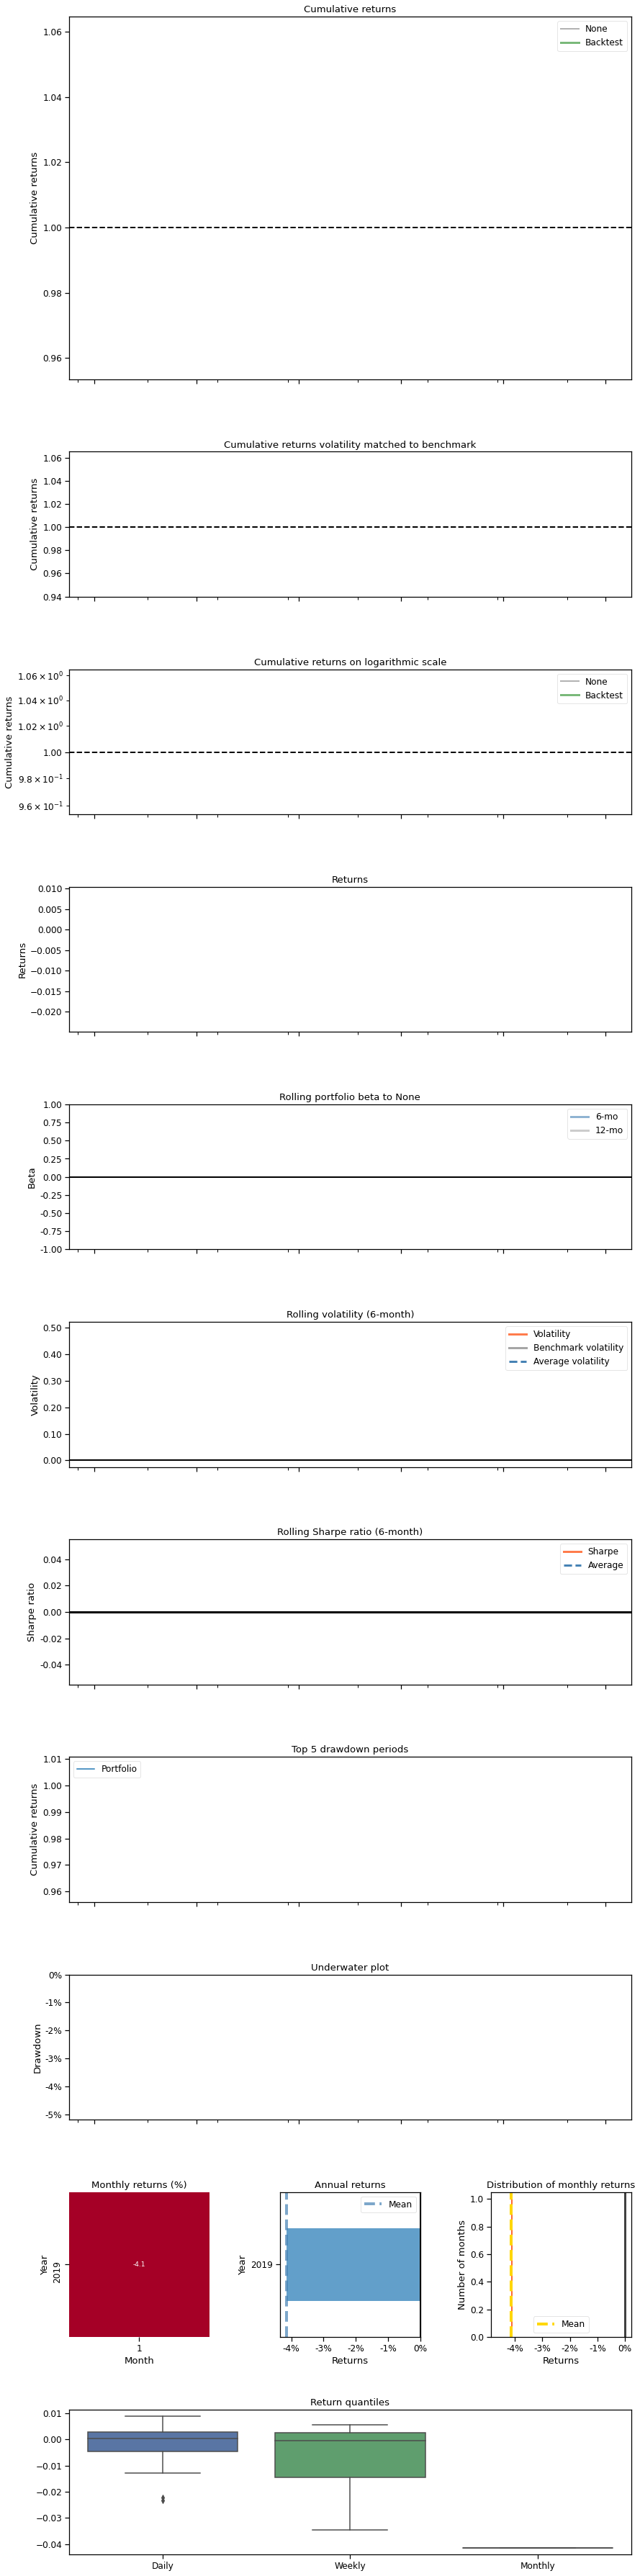

In [56]:
%matplotlib inline
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = DRL_strat,
                                   benchmark_rets=dow_strat, set_context=False)